# Chapter 5 Laboratory - Is Knowledge Power?

## Foundations for statistical inference - Sampling distributions

In this lab, you will investigate the ways in which the statistics from a random sample of data can serve as point estimates for population parameters. We’re interested in formulating a _sampling distribution_ of our estimate in order to learn about the properties of the estimate, such as its distribution.

__Setting a seed:__ We will take some random samples and build sampling distributions in this lab, which means we should set a seed at the start of the lab.

## Getting Started

### Load packages

In this lab, we will explore and visualize the data using the tidyverse suite of packages. We will also use the infer package for resampling.

Let’s load the packages.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Setting the seed
np.random.seed(0)

# Setting seaborn theme
sns.set_theme()

## The data

A 2019 Gallup report states the following:

> The premise that scientific progress benefits people has been embodied in discoveries throughout the ages – from the development of vaccinations to the explosion of technology in the past few decades, resulting in billions of supercomputers now resting in the hands and pockets of people worldwide. Still, not everyone around the world feels science benefits them personally.

<cite>Source: [World Science Day: Is Knowledge Power?](https://news.gallup.com/opinion/gallup/268121/world-science-day-knowledge-power.aspx)</cite>

The Wellcome Global Monitor finds that 20% of people globally do not believe that the work scientists do benefits people like them. In this lab, you will assume this 20% is a true population proportion and learn about how sample proportions can vary from sample to sample by taking smaller samples from the population. We will first create our population assuming a population size of 100,000. This means 20,000 (20%) of the population think the work scientists do does not benefit them personally and the remaining 80,000 think it does.

In [2]:
global_monitor = pd.DataFrame({
    "scientist_work": np.array(["Benefits"] * 80000 + ["Doesn't benefit"] * 20000) 
})


The name of the data frame is `global_monitor` and the name of the variable that contains responses to the question _“Do you believe that the work scientists do benefit people like you?”_ is `scientist_work`.

We can quickly visualize the distribution of these responses using a bar plot.

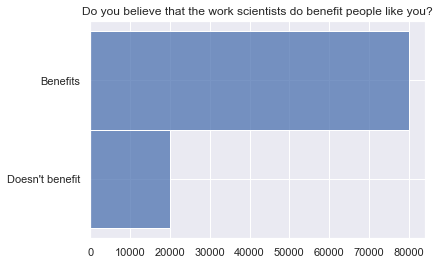

In [3]:
ax = sns.histplot(y="scientist_work", data=global_monitor)

plt.title("Do you believe that the work scientists do benefit people like you?")
plt.xlabel("")
plt.ylabel("")

plt.show()

We can also obtain summary statistics to confirm we constructed the data frame correctly.

In [4]:
stats = pd.concat([global_monitor.value_counts(), global_monitor.value_counts() / global_monitor.shape[0]], axis=1, ignore_index=True)
stats.columns = ["n", "p"]

stats

,n,p
scientist_work,,
Benefits,80000,0.8
Doesn't benefit,20000,0.2


## The unknown sampling distribution

In this lab, you have access to the entire population, but this is rarely the case in real life. Gathering information on an entire population is often extremely costly or impossible. Because of this, we often take a sample of the population and use that to understand the properties of the population.


In [5]:
sampl = global_monitor.sample(50)


This command collects a simple random sample of size 50 from the global_monitor dataset, and assigns the result to samp1. This is similar to randomly drawing names from a hat that contains the names of all in the population. Working with these 50 names is considerably simpler than working with all 100,000 people in the population.

### Exercise 1 - Describe the distribution of responses in this sample. How does it compare to the distribution of responses in the population. __Hint__: Although the `sample_n` function takes a random sample of observations (i.e. rows) from the dataset, you can still refer to the variables in the dataset with the same names. Code you presented earlier for visualizing and summarising the population data will still be useful for the sample, however be careful to not label your proportion `p`  since you’re now calculating a sample statistic, not a population parameters. You can customize the label of the statistics to indicate that it comes from the sample.

We can just use `value_counts()` to get some statistics about this new sample.

In [6]:
stats_hat = pd.concat([sampl.value_counts(), sampl.value_counts() / sampl.shape[0]], axis=1, ignore_index=True)
stats_hat.columns = ["n", "p"]

stats_hat

,n,p
scientist_work,,
Benefits,41,0.82
Doesn't benefit,9,0.18


Depending on which 50 people you selected, your estimate could be a bit above or a bit below the true population proportion of 0.26. In general, though, the sample proportion turns out to be a pretty good estimate of the true population proportion, and you were able to get it by sampling less than 1% of the population.

### Exercise 2 - Would you expect the sample proportion to match the sample proportion of another student’s sample? Why, or why not? If the answer is no, would you expect the proportions to be somewhat different or very different? Ask a student team to confirm your answer.

I would expect the sample proportions to vary slightly, not by a huge amount but to slightly vary around the population mean.

### Exercise 3 - Take a second sample, also of size 50, and call it `samp2`. How does the sample proportion of `samp2` compare with that of `samp1`? Suppose we took two more samples, one of size 100 and one of size 1000. Which would you think would provide a more accurate estimate of the population proportion?

Let's make `samp2`. 

In [7]:
samp2 = global_monitor.sample(50)

samp2.value_counts() / samp2.shape[0]

scientist_work 
Benefits           0.86
Doesn't benefit    0.14
dtype: float64

We see that proportions slightly change here. Let's now take two more samples, one of size 100 and another one of size 1000.

In [8]:
samp100 = global_monitor.sample(100)
samp1000 = global_monitor.sample(1000)

print(samp100.value_counts() / samp100.shape[0])
print(samp1000.value_counts() / samp1000.shape[0])

scientist_work 
Benefits           0.81
Doesn't benefit    0.19
dtype: float64
scientist_work 
Benefits           0.806
Doesn't benefit    0.194
dtype: float64


We still see variance but as the sample gets bigger, the sample proportions get closer to the true population proportions.

Not surprisingly, every time you take another random sample, you might get a different sample proportion. It’s useful to get a sense of just how much variability you should expect when estimating the population mean this way. The distribution of sample proportions, called the _sampling distribution (of the proportion)_, can help you understand this variability. In this lab, because you have access to the population, you can build up the sampling distribution for the sample proportion by repeating the above steps many times. Here, we use Python to take 15,000 different samples of size 50 from the population, calculate the proportion of responses in each sample, filter for only the _Doesn’t benefit_ responses, and store each result in a vector called `sample_props50`. Note that we specify that `replace = True` since sampling distributions are constructed by sampling with replacement.

In [9]:
sample_props50 = [global_monitor.sample(50) for _ in range(15000)]
sample_props50_df = pd.concat(sample_props50, axis=0, ignore_index=True)
sample_props50_df = pd.concat([sample_props50_df.value_counts(), sample_props50_df.value_counts() / sample_props50_df.shape[0]], axis=1, ignore_index=True)
sample_props50_df.columns = ["n", "p"]

sample_props50_df


,n,p
scientist_work,,
Benefits,599755,0.799673
Doesn't benefit,150245,0.200327


And we can visualize the distribution of these proportions with a histogram.

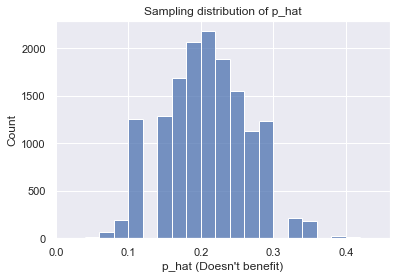

In [10]:
p_hats_db = np.array([df[df["scientist_work"] == "Doesn't benefit"].shape[0] / df.shape[0] for df in sample_props50])

sns.histplot(p_hats_db, binwidth=0.02)
plt.xlabel("p_hat (Doesn't benefit)")
plt.title("Sampling distribution of p_hat")

plt.show()

### Exercise 4 - How many elements are there in sample_props50? Describe the sampling distribution, and be sure to specifically note its center. Make sure to include a plot of the distribution in your answer.

There are 15,000 samples of 50 elements each, so in total there are 750,000 observations. You can see above the distribution of the proportion of those labelled as _Doesn't benefit_. If we want to see who _Benefits_, we can use the same logic as above. In any case, we see that the sample proportion of _Doesn't benefit_ is centered around 0.2, while the sample proportion of those labelled as _Benefits_ is centered around 0.8.

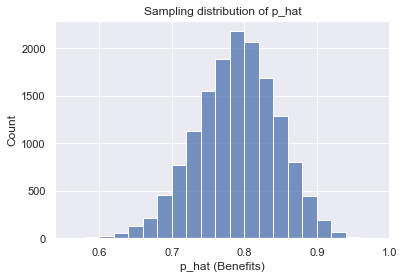

In [11]:
p_hats_b = np.array([df[df["scientist_work"] == "Benefits"].shape[0] / df.shape[0] for df in sample_props50])

sns.histplot(p_hats_b, binwidth=0.02)
plt.xlabel("p_hat (Benefits)")
plt.title("Sampling distribution of p_hat")

plt.show()

## Interlude: Sampling distributions

The idea behind the previous is _repetition_. Earlier, you took a single sample of size `n` (50) from the population of all people in the population. With this new function, you can repeat this sampling procedure different times in order to build a distribution of a series of sample statistics, which is called the __sampling distribution__.

Note that in practice one rarely gets to build true sampling distributions, because one rarely has access to data from the entire population.


### Exercise 5 - To make sure you understand how sampling distributions are built, and exactly what the `rep_sample_n` (in R) function does, try modifying the code to create a sampling distribution of 25 sample proportions from samples of size 10, and put them in a data frame named sample_props_small. Print the output. How many observations are there in this object called sample_props_small? What does each observation represent?

In Python, we just make an array of 25 dataframes each containing 10 observations sampled from the population data. It's easy to predict that there will be a total of $25 * 10 = 250$ observations in total, split over our samples. Each observation is randomly sampled (with replacement) from the true population data.

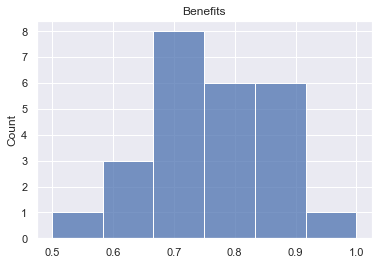

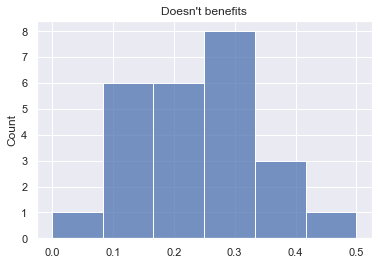

In [25]:
sample_props_small = [global_monitor.sample(10) for _ in range(25)]
sample_props_small_df = pd.concat(sample_props_small, axis=0)

p_hat_db_small = np.array([df[df["scientist_work"] == "Doesn't benefit"].shape[0] / df.shape[0] for df in sample_props_small])
p_hat_b_small = np.array([df[df["scientist_work"] == "Benefits"].shape[0] / df.shape[0] for df in sample_props_small])

sns.histplot(p_hat_b_small)
plt.title("Benefits")
plt.show()

sns.histplot(p_hat_db_small)
plt.title("Doesn't benefits")
plt.show()

## Sample size and the sampling distribution

Mechanics aside, let’s return to the reason we used the above function: to compute a sampling distribution, specifically, the sampling distribution of the proportions from samples of 50 people.

The sampling distribution that you computed tells you much about estimating the true proportion of people who think that the work scientists do doesn’t benefit them. Because the sample proportion is an unbiased estimator, the sampling distribution is centered at the true population proportion, and the spread of the distribution indicates how much variability is incurred by sampling only 50 people at a time from the population.

In the remainder of this section, you will work on getting a sense of the effect that sample size has on your sampling distribution.

### Exercise 6 - Use the app below to create sampling distributions of proportions of Doesn’t benefit from samples of size 10, 50, and 100. Use 5,000 simulations. What does each observation in the sampling distribution represent? How does the mean, standar error, and shape of the sampling distribution change as the sample size increases? How (if at all) do these values change if you increase the number of simulations? (You do not need to include plots in your answer.)

The app can be found [here](https://openintro.shinyapps.io/sampling_distributions/) scrolling down to exercise 6. 
Each observation in the sampling distribution is the observed distribution parameter of that sample. As the sample size increases, _mean_ gets closer to the true population mean, _standard error_ get's smaller and thus the _shape_ get's narrower and of course more symmetric. Values don't change, we just have more observations, which are as noisy as the others.

## More Practice

So far, you have only focused on estimating the proportion of those you think the work scientists doesn’t benefit them. Now, you’ll try to estimate the proportion of those who think it does.

Note that while you might be able to answer some of these questions using the app, you are expected to write the required code and produce the necessary plots and summary statistics. You are welcome to use the app for exploration.

### Exercise 7 - Take a sample of size 15 from the population and calculate the proportion of people in this sample who think the work scientists do enchances their lives. Using this sample, what is your best point estimate of the population proportion of people who think the work scientists do enchances their lives?

In [28]:
sample_15 = global_monitor.sample(15)

mean_15 = sample_15[sample_15["scientist_work"] == "Benefits"].shape[0] / sample_15.shape[0]

print(f"Sample mean (n = 15) is {mean_15}")

Sample mean (n = 15) is 0.7333333333333333


### Exercise 8 - Since you have access to the population, simulate the sampling distribution of proportion of those who think the work scientists do enchances their lives for samples of size 15 by taking 2000 samples from the population of size 15 and computing 2000 sample proportions. Store these proportions in as `sample_props15`. Plot the data, then describe the shape of this sampling distribution. Based on this sampling distribution, what would you guess the true proportion of those who think the work scientists do enchances their lives to be? Finally, calculate and report the population proportion.

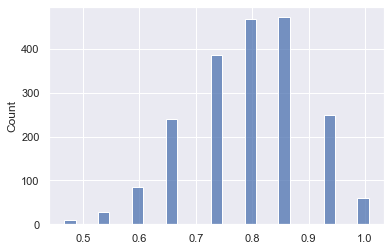

In [36]:
sample_props15 = [global_monitor.sample(15) for _ in range(2000)]
sample_props15_df = pd.concat(sample_props15)
sample_props15_p = np.array([df[df["scientist_work"] == "Benefits"].shape[0] / df.shape[0] for df in sample_props15])

sns.histplot(sample_props15_p, binwidth=0.02)
plt.show()

The shape is approximately normal, centered roughly on 0.80/0.85, which is reasonably close to the true population mean, but still very inaccurate.

### Exercise 9 - Change your sample size from 15 to 150, then compute the sampling distribution using the same method as above, and store these proportions in a new object called sample_props150. Describe the shape of this sampling distribution and compare it to the sampling distribution for a sample size of 15. Based on this sampling distribution, what would you guess to be the true proportion of those who think the work scientists do enchances their lives?

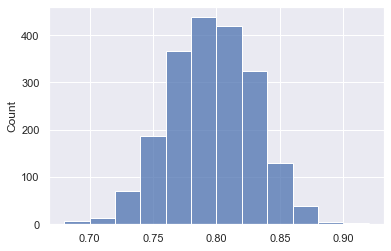

In [37]:
sample_props150 = [global_monitor.sample(150) for _ in range(2000)]
sample_props150_df = pd.concat(sample_props150)
sample_props150_p = np.array([df[df["scientist_work"] == "Benefits"].shape[0] / df.shape[0] for df in sample_props150])

sns.histplot(sample_props150_p, binwidth=0.02)
plt.show()

### Exercise 10 - Of the sampling distributions from 2 and 3, which has a smaller spread? If you’re concerned with making estimates that are more often close to the true value, would you prefer a sampling distribution with a large or small spread?

The second has a smaller spread (given that the sample size is bigger), and of course it is preferred since it is more accurate and informative: a greater spread wouldn't be as precise to describe the data.